In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("BathSoapHousehold.csv")
df.head()
df.columns

Index(['Member id', 'SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD',
       'CS', 'Affluence Index', 'No. of Brands', 'Brand Runs', 'Total Volume',
       'No. of  Trans', 'Value', 'Trans / Brand Runs', 'Vol/Tran',
       'Avg. Price ', 'Pur Vol No Promo - %', 'Pur Vol Promo 6 %',
       'Pur Vol Other Promo %', 'Br. Cd. 57, 144', 'Br. Cd. 55', 'Br. Cd. 272',
       'Br. Cd. 286', 'Br. Cd. 24', 'Br. Cd. 481', 'Br. Cd. 352', 'Br. Cd. 5',
       'Others 999', 'Pr Cat 1', 'Pr Cat 2', 'Pr Cat 3', 'Pr Cat 4',
       'PropCat 5', 'PropCat 6', 'PropCat 7', 'PropCat 8', 'PropCat 9',
       'PropCat 10', 'PropCat 11', 'PropCat 12', 'PropCat 13', 'PropCat 14',
       'PropCat 15'],
      dtype='object')

In [52]:
df2 = df.loc[:, ["Total Volume", "Value", "No. of Brands", "Brand Runs", "Avg. Price ", "Trans / Brand Runs", "No. of  Trans", "Vol/Tran"]]
df2

,Total Volume,Value,No. of Brands,Brand Runs,Avg. Price,Trans / Brand Runs,No. of Trans,Vol/Tran
0,8025,818.00,3,17,10.19,1.41,24,334.38
1,13975,1681.50,5,25,12.03,1.60,40,349.38
2,23100,1950.00,5,37,8.44,1.70,63,366.67
3,1500,114.00,2,4,7.60,1.00,4,375.00
4,8300,591.00,3,6,7.12,2.17,13,638.46
...,...,...,...,...,...,...,...,...
595,9025,1218.00,3,5,13.50,4.40,22,410.23
596,5050,851.00,5,23,16.85,1.22,28,180.36
597,29100,3302.75,4,19,11.35,1.32,25,1164.00
598,5500,460.00,3,15,8.36,1.27,19,289.47


In [53]:
df2.rename(columns={"No. of  Trans": "No. of Trans", "Avg. Price ": "Avg Price", "Trans / Brand Runs": "Trans/Brand Runs"}, 
           inplace = True)


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
kmeans_df = KMeans(n_clusters=3)

scaler = StandardScaler()
scaler.fit(df2)
standardized_df = scaler.transform(df2)
print(standardized_df)

df2[["Total_Volume_z", "Value_Index_z", "No_of_Brands_z", "Brand_Runs_z", "Avg_Price_z", "Trans/Brand_Runs_z", "No_of_Trans_z",	"Vol/Tran_z"]] = standardized_df
df2

[[-0.50100745 -0.58859376 -0.40336402 ... -0.4640838  -0.41081057
  -0.32456234]
 [ 0.26536031  0.38996609  0.86374809 ... -0.3910774   0.50805743
  -0.26421324]
 [ 1.44067222  0.69424325  0.86374809 ... -0.35265297  1.82893017
  -0.19465085]
 ...
 [ 2.21348005  2.22724481  0.23019203 ... -0.49866579 -0.35338132
   3.0132255 ]
 [-0.82623075 -0.99429663 -0.40336402 ... -0.517878   -0.69795681
  -0.50524753]
 [ 0.04961813  0.05395799 -0.40336402 ... -0.40644717 -0.98510306
   1.86486266]]


,Total Volume,Value,No. of Brands,Brand Runs,Avg Price,Trans/Brand Runs,No. of Trans,Vol/Tran,Total_Volume_z,Value_Index_z,No_of_Brands_z,Brand_Runs_z,Avg_Price_z,Trans/Brand_Runs_z,No_of_Trans_z,Vol/Tran_z
0,8025,818.00,3,17,10.19,1.41,24,334.38,-0.501007,-0.588594,-0.403364,0.120173,-0.439810,-0.464084,-0.410811,-0.324562
1,13975,1681.50,5,25,12.03,1.60,40,349.38,0.265360,0.389966,0.863748,0.890306,0.052220,-0.391077,0.508057,-0.264213
2,23100,1950.00,5,37,8.44,1.70,63,366.67,1.440672,0.694243,0.863748,2.045506,-0.907774,-0.352653,1.828930,-0.194651
3,1500,114.00,2,4,7.60,1.00,4,375.00,-1.341436,-1.386401,-1.036920,-1.131294,-1.132397,-0.621624,-1.559396,-0.161137
4,8300,591.00,3,6,7.12,2.17,13,638.46,-0.465587,-0.845841,-0.403364,-0.938760,-1.260753,-0.172058,-1.042532,0.898835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,9025,1218.00,3,5,13.50,4.40,22,410.23,-0.372206,-0.135294,-0.403364,-1.035027,0.445310,0.684807,-0.525669,-0.019397
596,5050,851.00,5,23,16.85,1.22,28,180.36,-0.884191,-0.551197,0.863748,0.697773,1.341127,-0.537090,-0.181094,-0.944227
597,29100,3302.75,4,19,11.35,1.32,25,1164.00,2.213480,2.227245,0.230192,0.312706,-0.129617,-0.498666,-0.353381,3.013226
598,5500,460.00,3,15,8.36,1.27,19,289.47,-0.826231,-0.994297,-0.403364,-0.072360,-0.929167,-0.517878,-0.697957,-0.505248


In [55]:
X = df2.loc[:, ["Total_Volume_z", "Value_Index_z", "No_of_Brands_z", "Brand_Runs_z", "Avg_Price_z", "Trans/Brand_Runs_z", "No_of_Trans_z",	"Vol/Tran_z"]]

In [56]:
# -- Define a elbow function --
def elbow(min_k,max_k,X):
    inertia = []
    # df = customer_cluster[['Annual_Income_z','Spending_z']]
    K = range(min_k,max_k)
    for k in K:
        kmeans_soap = KMeans(n_clusters=k)
        kmeans_soap.fit(X)
        inertia.append(kmeans_soap.inertia_)
    
    plt.figure(figsize=(10,8))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Inertia')
    plt.title('Optimal K - The Elbow Method')
    plt.show()   

z:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


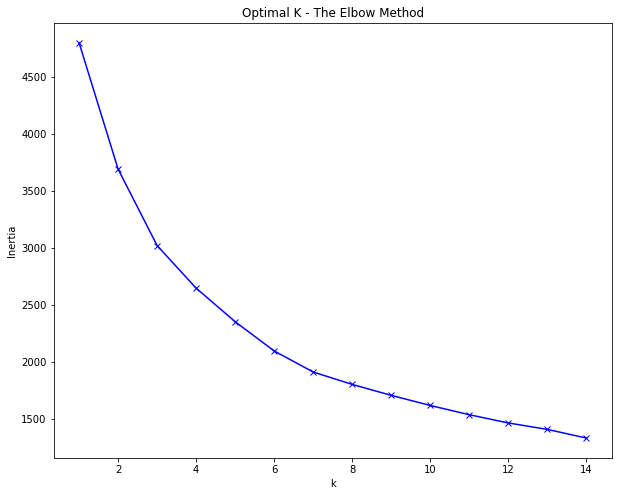

In [57]:
elbow(1, 15, X)

In [58]:
from sklearn import metrics
def silhouette(min_k, max_k, X):
    silhouette_avgs = []

    # --- try k from 2 to maximum number of labels ---
    for k in range(min_k, max_k):
        kmean = KMeans(n_clusters = k).fit(X)
        score = metrics.silhouette_score(X, kmean.labels_)
        print('Silhouette Coefficient for k = ',k,' is ', score)
        silhouette_avgs.append(score)

    # --- the optimal k is the one with the highest average silhouette ---
    Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
    print('Optimal K is ', Optimal_K)
    
    f, ax = plt.subplots(figsize=(7,5))
    ax.plot(range(min_k, max_k),silhouette_avgs)
    
    plt.title('Silhouette Coefficient')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Coefficients')
    plt.grid(True)
    plt.show()

Silhouette Coefficient for k =  2  is  0.23481467651726026
Silhouette Coefficient for k =  3  is  0.24822457509386614
Silhouette Coefficient for k =  4  is  0.2546937819766269
Silhouette Coefficient for k =  5  is  0.2115782458130048
Silhouette Coefficient for k =  6  is  0.2045295061359585
Silhouette Coefficient for k =  7  is  0.20840816076039725
Silhouette Coefficient for k =  8  is  0.19110882192512454
Silhouette Coefficient for k =  9  is  0.18231546727403844
Silhouette Coefficient for k =  10  is  0.18318645210134255
Silhouette Coefficient for k =  11  is  0.18349699300119232
Silhouette Coefficient for k =  12  is  0.1852824440261505
Silhouette Coefficient for k =  13  is  0.18493907561269257
Silhouette Coefficient for k =  14  is  0.18619031464161043
Optimal K is  4


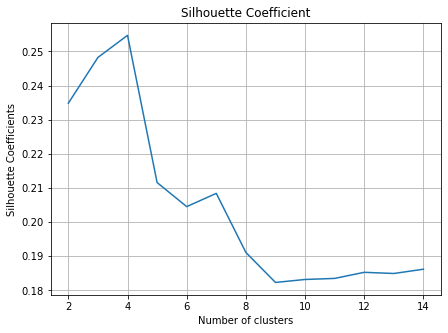

In [59]:
silhouette(2,15,X)

In [60]:
kmeans_soap = KMeans(n_clusters= 4)

kmeans_soap.fit(X)

KMeans(n_clusters=4)

In [61]:
cluster = kmeans_soap.labels_
print(len(cluster))

600


In [66]:
cluster

array([0, 1, 1, 0, 0, 1, 0, 0, 3, 0, 1, 1, 3, 0, 0, 1, 1, 0, 0, 0, 0, 2,
       3, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 3, 0,
       3, 0, 0, 0, 2, 1, 2, 0, 0, 3, 2, 3, 3, 1, 2, 0, 1, 1, 2, 0, 1, 0,
       1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 3, 0, 0, 1, 2, 0, 0, 1, 0, 3,
       0, 0, 1, 3, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 0,
       2, 0, 0, 1, 3, 1, 1, 0, 1, 1, 0, 1, 0, 3, 3, 3, 3, 0, 0, 1, 1, 1,
       0, 0, 2, 0, 0, 1, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 3, 0, 2, 3, 1, 3, 1, 3, 0, 1, 0, 1, 1, 0, 2, 3, 1,
       2, 0, 2, 0, 0, 3, 1, 1, 1, 0, 3, 1, 3, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 2, 3, 3, 0, 2, 0, 0, 3, 0, 1, 0, 0, 1, 0, 3, 0, 0, 1, 1, 1,
       0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 2, 2, 0, 0, 1, 0, 2, 0, 1, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 3, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 3, 3, 0, 1, 0, 0, 1, 1, 0, 0, 3, 0, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

In [62]:
cluster_center = kmeans_soap.cluster_centers_

In [63]:
soaps_cluster = pd.concat([df2, pd.DataFrame(cluster, columns=['cluster'])],
                             axis=1)
soaps_cluster.head()

,Total Volume,Value,No. of Brands,Brand Runs,Avg Price,Trans/Brand Runs,No. of Trans,Vol/Tran,Total_Volume_z,Value_Index_z,No_of_Brands_z,Brand_Runs_z,Avg_Price_z,Trans/Brand_Runs_z,No_of_Trans_z,Vol/Tran_z,cluster
0,8025,818.0,3,17,10.19,1.41,24,334.38,-0.501007,-0.588594,-0.403364,0.120173,-0.439810,-0.464084,-0.410811,-0.324562,0
1,13975,1681.5,5,25,12.03,1.60,40,349.38,0.265360,0.389966,0.863748,0.890306,0.052220,-0.391077,0.508057,-0.264213,1
2,23100,1950.0,5,37,8.44,1.70,63,366.67,1.440672,0.694243,0.863748,2.045506,-0.907774,-0.352653,1.828930,-0.194651,1
3,1500,114.0,2,4,7.60,1.00,4,375.00,-1.341436,-1.386401,-1.036920,-1.131294,-1.132397,-0.621624,-1.559396,-0.161137,0
4,8300,591.0,3,6,7.12,2.17,13,638.46,-0.465587,-0.845841,-0.403364,-0.938760,-1.260753,-0.172058,-1.042532,0.898835,0


In [64]:
import seaborn as sns
# sns.pairplot(X)

In [68]:
soaps_cluster.corr().style.background_gradient("Blues")

,Total Volume,Value,No. of Brands,Brand Runs,Avg Price,Trans/Brand Runs,No. of Trans,Vol/Tran,Total_Volume_z,Value_Index_z,No_of_Brands_z,Brand_Runs_z,Avg_Price_z,Trans/Brand_Runs_z,No_of_Trans_z,Vol/Tran_z,cluster
Total Volume,1.000000,0.876424,0.213046,0.252600,-0.250296,0.198094,0.494565,0.620242,1.000000,0.876424,0.213046,0.252600,-0.250296,0.198094,0.494565,0.620242,0.730525
Value,0.876424,1.000000,0.302480,0.383639,0.154447,0.047604,0.571126,0.417338,0.876424,1.000000,0.302480,0.383639,0.154447,0.047604,0.571126,0.417338,0.639434
No. of Brands,0.213046,0.302480,1.000000,0.688973,0.097313,-0.318563,0.543916,-0.230881,0.213046,0.302480,1.000000,0.688973,0.097313,-0.318563,0.543916,-0.230881,0.178822
Brand Runs,0.252600,0.383639,0.688973,1.000000,0.174813,-0.372869,0.774296,-0.311542,0.252600,0.383639,0.688973,1.000000,0.174813,-0.372869,0.774296,-0.311542,0.209121
Avg Price,-0.250296,0.154447,0.097313,0.174813,1.000000,-0.252831,0.060278,-0.348726,-0.250296,0.154447,0.097313,0.174813,1.000000,-0.252831,0.060278,-0.348726,-0.153994
Trans/Brand Runs,0.198094,0.047604,-0.318563,-0.372869,-0.252831,1.000000,0.016534,0.220249,0.198094,0.047604,-0.318563,-0.372869,-0.252831,1.000000,0.016534,0.220249,0.294680
No. of Trans,0.494565,0.571126,0.543916,0.774296,0.060278,0.016534,1.000000,-0.234622,0.494565,0.571126,0.543916,0.774296,0.060278,0.016534,1.000000,-0.234622,0.367772
Vol/Tran,0.620242,0.417338,-0.230881,-0.311542,-0.348726,0.220249,-0.234622,1.000000,0.620242,0.417338,-0.230881,-0.311542,-0.348726,0.220249,-0.234622,1.000000,0.474888
Total_Volume_z,1.000000,0.876424,0.213046,0.252600,-0.250296,0.198094,0.494565,0.620242,1.000000,0.876424,0.213046,0.252600,-0.250296,0.198094,0.494565,0.620242,0.730525
Value_Index_z,0.876424,1.000000,0.302480,0.383639,0.154447,0.047604,0.571126,0.417338,0.876424,1.000000,0.302480,0.383639,0.154447,0.047604,0.571126,0.417338,0.639434


In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

log_regress = LogisticRegression(solver='liblinear')
log_regress
y = soaps_cluster["cluster"]
X_log_regress = X.loc[:, ["Total_Volume_z", "Value_Index_z", "Vol/Tran_z"]]
# tried running with lower test size and it started to perform significantly worse on the validation set
X_train, X_test, y_train, y_test = train_test_split(X_log_regress, y, test_size=0.3, random_state=1) # tried running with lower test size and it started to perform significantly worse on the validation set

log_regress.fit(X_train, y_train)
X_train.head()

,Total_Volume_z,Value_Index_z,Vol/Tran_z
241,-0.311026,-0.123395,-0.974924
400,-1.447697,-1.425498,-0.312010
286,-0.488127,-0.699652,-0.809608
379,-0.202188,-0.084865,-0.784302
314,4.435303,3.488833,1.660118


--- Confusion Matrix using matric function ---


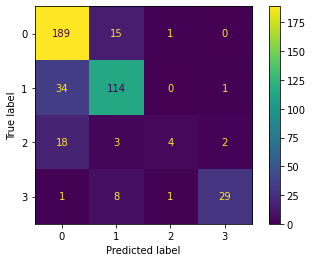

In [91]:
from sklearn.metrics import ConfusionMatrixDisplay

print('--- Confusion Matrix using matric function ---')

ConfusionMatrixDisplay.from_estimator(log_regress, X=X_train, y=y_train);

In [92]:
from sklearn.metrics import classification_report

y_pred_train = log_regress.predict(X_train)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       205
           1       0.81      0.77      0.79       149
           2       0.67      0.15      0.24        27
           3       0.91      0.74      0.82        39

    accuracy                           0.80       420
   macro avg       0.79      0.64      0.67       420
weighted avg       0.80      0.80      0.78       420



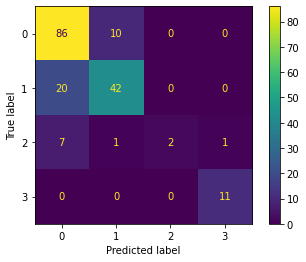

In [93]:
ConfusionMatrixDisplay.from_estimator(log_regress, X=X_test, y=y_test);

In [94]:
y_pred_test = log_regress.predict(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82        96
           1       0.79      0.68      0.73        62
           2       1.00      0.18      0.31        11
           3       0.92      1.00      0.96        11

    accuracy                           0.78       180
   macro avg       0.87      0.69      0.70       180
weighted avg       0.80      0.78      0.77       180

